In [1]:
# imports and check files
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import joblib

# show files in the dataset folder
!ls -la /kaggle/input/car-price-prediction


total 48
drwxr-xr-x 2 nobody nogroup     0 Oct  1 17:36  .
drwxr-xr-x 3 root   root     4096 Oct  3 15:31  ..
-rw-r--r-- 1 nobody nogroup 26717 Oct  1 17:36  CarPrice_Assignment.csv
-rw-r--r-- 1 nobody nogroup 14884 Oct  1 17:36 'Data Dictionary - carprices.xlsx'


In [2]:
# load dataset
csv_path = "/kaggle/input/car-price-prediction/CarPrice_Assignment.csv"
df = pd.read_csv(csv_path)
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# quick EDA
print("rows, cols:", df.shape)
display(df.info())
display(df.describe().T)
print("missing values per column:")
display(df.isnull().sum())


rows, cols: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 

None

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


missing values per column:


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
# extract brand and small cleanups
df['brand'] = df['CarName'].apply(lambda x: str(x).split(' ')[0].lower())

# fix common typos
typos = {'maxda':'mazda','porcshce':'porsche','toyouta':'toyota',
         'vokswagen':'volkswagen','vw':'volkswagen'}
df['brand'] = df['brand'].replace(typos)

# drop ID and original CarName
df = df.drop(['car_ID'], axis=1)
df = df.drop(['CarName'], axis=1)

df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [5]:
# check categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols


['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

In [6]:
# one-hot encode categorical features and avoid multicollinearity
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("after encoding shape:", df.shape)


after encoding shape: (205, 65)


In [7]:
# split X, y and train/test
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print("train shape:", X_train.shape, "test shape:", X_test.shape)


train shape: (164, 64) test shape: (41, 64)


In [8]:
# scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Linear Regression baseline
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("LR R2:", r2_score(y_test, y_pred_lr).round(4))
print("LR RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False).round(2))


LR R2: -1.0419497587222164e+24
LR RMSE: 9069493012738966.0


In [10]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("RF R2:", r2_score(y_test, y_pred_rf).round(4))
print("RF RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False).round(2))


RF R2: 0.9584
RF RMSE: 1811.84


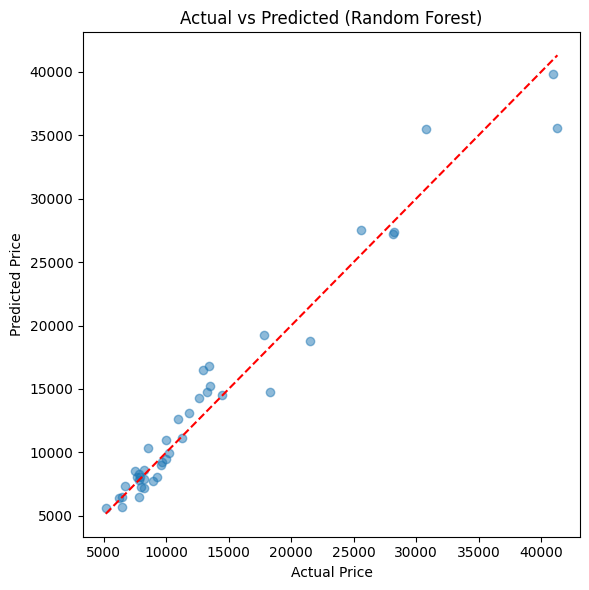

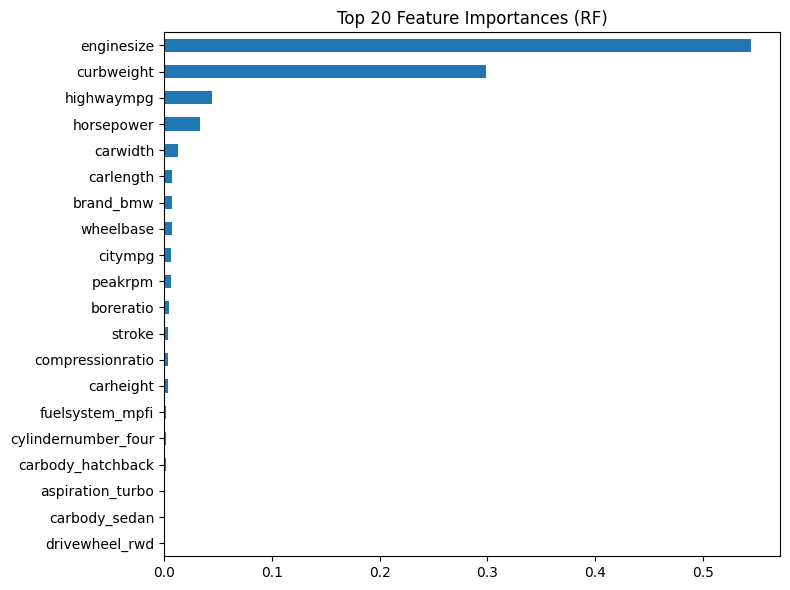

In [11]:
# results folder and plots
os.makedirs('/kaggle/working/results', exist_ok=True)

# actual vs predicted (RF)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Random Forest)")
plt.tight_layout()
plt.savefig('/kaggle/working/results/pred_vs_actual_rf.png')
plt.show()

# top feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
feat_imp[::-1].plot(kind='barh')  # reversed for nicer plot
plt.title("Top 20 Feature Importances (RF)")
plt.tight_layout()
plt.savefig('/kaggle/working/results/feature_importances.png')
plt.show()


In [12]:
# save models and scaler to /kaggle/working
joblib.dump(rf, "/kaggle/working/rf_model.joblib")
joblib.dump(lr, "/kaggle/working/lr_model.joblib")
joblib.dump(scaler, "/kaggle/working/scaler.joblib")

# list files to confirm
!ls -la /kaggle/working


total 1448
drwxr-xr-x 3 root root    4096 Oct  3 15:32 .
drwxr-xr-x 8 root root    4096 Oct  3 15:31 ..
-rw-r--r-- 1 root root    1576 Oct  3 15:32 lr_model.joblib
---------- 1 root root  152553 Oct  3 15:32 __notebook__.ipynb
drwxr-xr-x 2 root root    4096 Oct  3 15:32 results
-rw-r--r-- 1 root root 1306145 Oct  3 15:32 rf_model.joblib
-rw-r--r-- 1 root root    3431 Oct  3 15:32 scaler.joblib


In [13]:
# README.md and requirements.txt repo
readme_text = """# Car Price Prediction

This repository contains a Kaggle notebook that:
- loads the Car Price dataset (CarPrice_Assignment.csv),
- does basic EDA and cleaning,
- trains Linear Regression and Random Forest models to predict car price,
- saves results and models.

Files:
- `used_car_price_prediction.ipynb` — the notebook.
- `results/` — saved plots.
- `rf_model.joblib` — trained Random Forest model.
- `requirements.txt` — minimal packages to run locally.

Dataset: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
"""

with open('/kaggle/working/README.md','w') as f:
    f.write(readme_text)

requirements = """pandas
numpy
scikit-learn
matplotlib
seaborn
joblib
"""
with open('/kaggle/working/requirements.txt','w') as f:
    f.write(requirements)

!ls -la /kaggle/working


total 1456
drwxr-xr-x 3 root root    4096 Oct  3 15:32 .
drwxr-xr-x 8 root root    4096 Oct  3 15:31 ..
-rw-r--r-- 1 root root    1576 Oct  3 15:32 lr_model.joblib
---------- 1 root root  153130 Oct  3 15:32 __notebook__.ipynb
-rw-r--r-- 1 root root     538 Oct  3 15:32 README.md
-rw-r--r-- 1 root root      52 Oct  3 15:32 requirements.txt
drwxr-xr-x 2 root root    4096 Oct  3 15:32 results
-rw-r--r-- 1 root root 1306145 Oct  3 15:32 rf_model.joblib
-rw-r--r-- 1 root root    3431 Oct  3 15:32 scaler.joblib
